# ML_SP23_HW2 (DIY Decision Tree)

### Due Date: 4/7 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('breast_cancer.csv')
X = df.drop(['diagnosis'], axis=1).to_numpy()
# B is benign and is encoded as 0, M is maligant and is encoded as 1
y = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0).to_numpy()

In [3]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: xlabel='diagnosis', ylabel='count'>

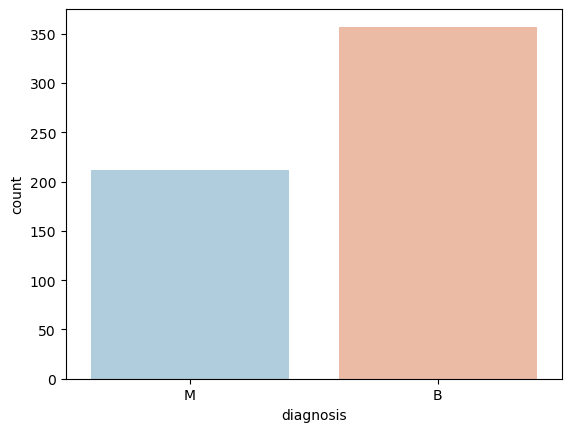

In [5]:
sns.countplot(x='diagnosis', data=df, palette='RdBu_r')

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

### First build the model with the standard sklearn library

In [7]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[71  1]
 [ 4 38]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193


### Second use the implementation of the blog to build the model

https://towardsdatascience.com/implementing-a-decision-tree-from-scratch-f5358ff9c4bb

In [9]:
from decision_tree_orig import DecisionTree
model = DecisionTree(max_depth=10)
model.fit(X_train, y_train)

Done fitting


In [10]:
from decision_tree_orig import accuracy_score
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.956140350877193


In [11]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



### Note that the original implementation will not work if y is a categorical variable and it is expecting numpy array instead of DataFrame

In [12]:
X = df.drop(['diagnosis'], axis=1).to_numpy()
# without mapping M and B to 1 and 0, it will not work with the original code
# y = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0).to_numpy()
y = df['diagnosis'].to_numpy()
y[:10]

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M'], dtype=object)

***You will see an error below***

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)
model.fit(X_train, y_train)
print(accuracy_score(y_test, predictions))

TypeError: Cannot cast array data from dtype('O') to dtype('int64') according to the rule 'safe'

### Finally use your own improved implementation to build the model

***Show below that your version can handle both integer or categorical variable***

In [14]:
from decision_tree import DecisionTreeModel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# replace the above with your version
model = DecisionTreeModel(max_depth=10, impurity_stopping_threshold=0.01)

X = df.drop(['diagnosis'], axis=1).to_numpy()
# Your implementation should allow the target variable to be also categorical variable, ie y being B or M
# y = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0).to_numpy()
y = df['diagnosis'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [15]:
y_train[:10]

array(['M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B'], dtype=object)

In [16]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

Done fitting
0.9473684210526315


### Call your own performance report

In [17]:
from decision_tree import classification_report, confusion_matrix, accuracy_score
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[69, 3], [3, 39]]
                        precision       recall     f1-score      support     accuracy
B                            0.96         0.96         0.96           72         0.95
M                            0.93         0.93         0.93           42         0.95

0.9473684210526315


### Try 3 different values for the impurity threshold for the Decision Tree Model. Comment on of the impact of the parameter (if there is any) on the model performance

In [18]:
# Type your code here
model = DecisionTreeModel(max_depth=10, impurity_stopping_threshold=0.1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

Done fitting
[[70, 2], [9, 33]]
                        precision       recall     f1-score      support     accuracy
B                            0.89         0.97         0.93           72         0.90
M                            0.94         0.79         0.86           42         0.90

0.9035087719298246


In [19]:
# Type your code here
model = DecisionTreeModel(max_depth=10, impurity_stopping_threshold=0.5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

Done fitting
[[72, 0], [42, 0]]
                        precision       recall     f1-score      support     accuracy
B                            0.63         1.00         0.77           72         0.63
M                            0.00         0.00         0.00           42         0.63

0.631578947368421


In [20]:
# Type your code here
model = DecisionTreeModel(max_depth=10, impurity_stopping_threshold=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

Done fitting
[[72, 0], [42, 0]]
                        precision       recall     f1-score      support     accuracy
B                            0.63         1.00         0.77           72         0.63
M                            0.00         0.00         0.00           42         0.63

0.631578947368421


As we increase the impurity_stopping_threshold the accuracy rate goes down, in the other hand incresing the max_depth inceases the acccuracy. lower max_depth causing underfitting.

### Finally call your RandomForest Model just like the standard sklearn library

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred))

              precision    recall  f1-score   support

           B       0.94      1.00      0.97        72
           M       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193


In [22]:
# Type your code here
from decision_tree import RandomForestModel
from decision_tree import classification_report, confusion_matrix, accuracy_score

# 100 can take a while, so you can use smaller value when you are testing
rfc = RandomForestModel(n_estimators=10, max_depth=10,
                        impurity_stopping_threshold=0.1)
rfc.fit(X_train, y_train)
# ...
# ...

Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting


In [23]:
rfc_pred = rfc.predict(X_test)

In [24]:
rfc_pred

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M'], dtype='<U1')

In [25]:
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred))

                        precision       recall     f1-score      support     accuracy
B                            0.00         0.00         0.00           72         0.37
M                            0.37         1.00         0.54           42         0.37

0.3684210526315789
